### Etivity-3DM

Prepared by : Damien Martin, Student ID: 10100913, Date Submitted: 29032020

This notebook demonstrates:
- the k-Means clustering algorithm
- the use of manifold-learning techniques to project a clustered dataset into a 2D space and visualise it as a scatterplot

### A. Import Python Modules and Dataset

#### Load the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]

In [2]:
df = pd.read_csv("./loans_train_preparedforweek3.csv")
data = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', data.shape)
df. describe()

(number of examples, number of attributes):  (614, 17)


,Unnamed: 0,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.248100,0.916588,1.076222,0.713355,0.855049,0.796417,0.021173,0.648208,0.004886,0.133550,0.052117,0.218241,0.379479,0.328990,0.687296,0.862686
std,177.390811,0.336541,0.412366,0.338744,0.134226,0.352339,0.402991,0.144077,0.477919,0.069786,0.340446,0.222445,0.413389,0.485653,0.470229,0.463973,0.428068
min,0.000000,0.000000,0.004634,0.005026,0.025000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005599
25%,153.250000,0.000000,0.662440,0.883668,0.750000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.597383
50%,306.500000,0.000000,0.815365,1.047319,0.750000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.783902
75%,459.750000,0.333333,1.078246,1.229571,0.750000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.035796
max,613.000000,1.000000,3.357480,2.461145,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.207353


In [25]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df.tail()
df. describe()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.248100,0.916588,1.076222,0.713355,0.855049,0.796417,0.021173,0.648208,0.004886,0.133550,0.052117,0.218241,0.379479,0.328990,0.687296,0.862686
std,0.336541,0.412366,0.338744,0.134226,0.352339,0.402991,0.144077,0.477919,0.069786,0.340446,0.222445,0.413389,0.485653,0.470229,0.463973,0.428068
min,0.000000,0.004634,0.005026,0.025000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005599
25%,0.000000,0.662440,0.883668,0.750000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.597383
50%,0.000000,0.815365,1.047319,0.750000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.783902
75%,0.333333,1.078246,1.229571,0.750000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.035796
max,1.000000,3.357480,2.461145,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.207353


### B. Rescale the Data
Here we rescale the values in each column to the interval $[0,1]$ with MinMaxScaler. Please note that if your dataset is already prepared for ML there is no need to rescale it again. See https://scikit-learn.org/stable/modules/preprocessing.html for alternative rescaling techniques. In your work on this exercise experiment with other rescaling techniques to see if they lead to a more insightful clustering.

In [5]:
min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(data)

In [4]:
df.describe()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.248100,0.916588,1.076222,0.713355,0.855049,0.796417,0.021173,0.648208,0.004886,0.133550,0.052117,0.218241,0.379479,0.328990,0.687296,0.862686
std,0.336541,0.412366,0.338744,0.134226,0.352339,0.402991,0.144077,0.477919,0.069786,0.340446,0.222445,0.413389,0.485653,0.470229,0.463973,0.428068
min,0.000000,0.004634,0.005026,0.025000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005599
25%,0.000000,0.662440,0.883668,0.750000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.597383
50%,0.000000,0.815365,1.047319,0.750000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.783902
75%,0.333333,1.078246,1.229571,0.750000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.035796
max,1.000000,3.357480,2.461145,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.207353


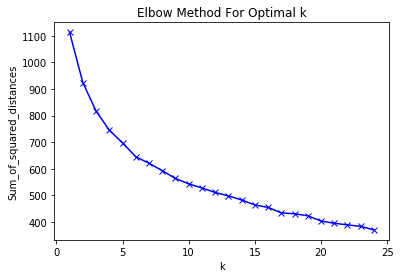

In [6]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,25)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
    
    
    
    
    

### C. Scatterplot Function (to be used below for visualising a clustering)

Skip this section when you read the notebook for the first time.

The function `clustering_scatterplot()` creates the 2D scatter plot of the clustered dataset.

In [16]:
colors = np.array(['orange', 'blue', 'lime', 'purple', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _=plt.title(title)
    _=plt.legend()
    _=plt.xlabel('x')
    _=plt.ylabel('y')

### D. K-Means Clustering

Number of clusters $k$.

In [17]:
k = 4

In [18]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

In [19]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

In [20]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


#### Multidimensional scaling (MDS) is a means of visualizing the level of similarity of individual cases of a dataset. MDS is used to translate "information about the pairwise 'distances' among a set of n objects or individuals" into a configuration of n points mapped into an abstract Cartesian space. 

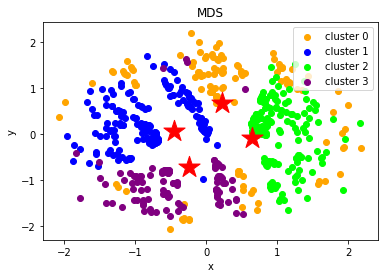

In [21]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

In [277]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


#### t-SNE is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results

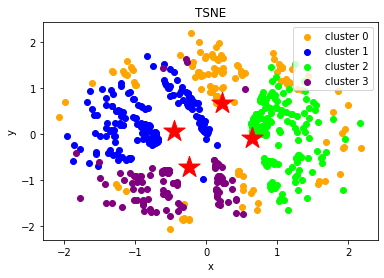

In [22]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

Automatically created module for IPython interactive environment
number of estimated clusters : 3


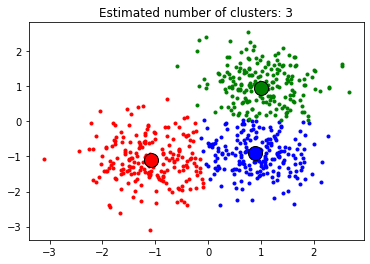

In [102]:

print(__doc__)

import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
data, _ = make_blobs(n_samples=614, centers=centers, cluster_std=0.6)

# #############################################################################
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(data, quantile=0.2, n_samples=614)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(data)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(data[my_members, 0], data[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


#### In a separate module we looked at the idea of purity of a cluster
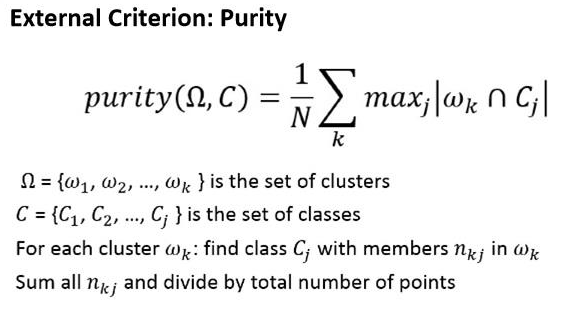


### F. Cluster Analysis

#### Add the cluster labels as an extra column in the original dataframe

In [242]:
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)

In [243]:
df.head()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,cluster
0,0.000000,1.084523,1.058140,0.75,1.0,1,0,0,0,0,0,0,0,1,1,0.841086,0
1,0.333333,0.925883,1.047319,0.75,1.0,1,0,1,0,0,0,0,0,0,0,0.871711,2
2,0.000000,0.683858,0.635920,0.75,1.0,1,0,1,0,1,0,0,0,1,1,0.385189,0
3,0.000000,0.608992,1.002824,0.75,1.0,1,0,1,0,0,0,1,0,1,1,0.717012,0
4,0.000000,1.101869,1.115650,0.75,1.0,1,0,0,0,0,0,0,0,1,1,0.860305,0


In [244]:
df.tail()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,cluster
609,0.000000,0.666409,0.676143,0.750,1.0,0,0,0,0,0,0,0,0,0,1,0.364708,1
610,1.000000,0.858916,0.395858,0.375,1.0,1,0,1,0,0,0,0,0,0,1,0.587496,2
611,0.333333,1.313719,1.566110,0.750,1.0,1,0,1,0,0,0,0,0,1,1,1.116075,0
612,0.666667,1.267616,1.325676,0.750,1.0,1,0,1,0,0,0,0,0,1,1,1.042256,0
613,0.000000,0.925883,1.074155,0.750,0.0,0,0,0,0,1,0,0,1,0,0,0.663523,1


#### Compute the mean value of each attribute for each cluster

In [245]:
df.groupby('cluster').mean()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
cluster,,,,,,,,,,,,,,,,
0,0.247525,0.904466,1.040693,0.695297,0.846535,0.821782,0.014851,0.648515,0.004950,0.118812,0.059406,0.198020,0.000000,1.0,0.658416,0.849975
1,0.101149,0.925721,1.024482,0.738966,0.862069,0.613793,0.013793,0.000000,0.013793,0.124138,0.062069,0.234483,0.565517,0.0,0.662069,0.800032
2,0.328340,0.920800,1.131201,0.713109,0.857678,0.876404,0.029963,1.000000,0.000000,0.149813,0.041199,0.224719,0.565543,0.0,0.722846,0.906328


#### Conclusion
still to be done